# CONFIG

In [2]:
import pandas as pd 
import numpy as np

import geopandas as gpd


import seaborn as sns

# Livrarias para ler dados do openstreetmaps e representação da rede de estradas como um grafo
import osmnx as ox
import networkx as nx

import re

#import pgeocode as pgc
#import geopy

import time

import matplotlib.pyplot as plt

import os

import pickle 






In [3]:
from tqdm import tqdm
#{progress in percentage} | {bar} | {processed}/{total} [{elapsed time}<{remaining time}, {number of iterations per seconds} it/s]

In [4]:
os.getcwd()

'c:\\Users\\pauloricardolb\\OneDrive - Universidade de Aveiro\\TRABALHO_SCRIPS\\py_GeoIdentifZones\\Main\\PreProcessing'

# Directorias

In [5]:
#PC UA
pathUA = "C:/Users/pauloricardolb/"
pathHPCasa = "C:/Users/Paulo B/" 

path = pathUA

path_DRIVITUP_SIG = "Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/"
path_DRIVITUP_TABLES = "Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/TABELAS/"

In [6]:
# SOURCE FOR PIKLE DATA
sourcePIKLE = path + "OneDrive - Universidade de Aveiro/TRABALHO_SCRIPS/py_GeoIdentifZones/DATA_Pikle"
sourceRawData = path + "OneDrive - Universidade de Aveiro/TRABALHO_SCRIPS/py_GeoIdentifZones/DATA_Raw"
sourceShapes = path + "OneDrive - Universidade de Aveiro/TRABALHO_SCRIPS/py_GeoIdentifZones/DATA_shapes"

## DADOS

In [7]:
sourceSIG_BASE_CAOP_gdb = path + path_DRIVITUP_SIG + "BASES_ADMIN_NACIONAL/ADMIN_CAOP_BASES.gdb"
sourceSIG_BASE_CAOP_gdb

'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/BASES_ADMIN_NACIONAL/ADMIN_CAOP_BASES.gdb'

In [8]:
sourceSIG_BASE_BGRI_gdb = path + path_DRIVITUP_SIG +  "BASE_INE/BGRI_SIG/BGRI_PTCONTINENTE.gdb"
sourceSIG_BASE_BGRI_gdb

'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/BASE_INE/BGRI_SIG/BGRI_PTCONTINENTE.gdb'

In [9]:
sourceSIG_BASE_COS_gdb = path + path_DRIVITUP_SIG +  "COS/COS.gdb"
sourceSIG_BASE_COS_gdb

'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/COS/COS.gdb'

In [10]:
sourceSIG_BASE_VARIOS_gdb = path + path_DRIVITUP_SIG +  "GEODATA_VARIOS.gdb"
sourceSIG_BASE_VARIOS_gdb



'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/GEODATA_VARIOS.gdb'

In [11]:
sourceSIG_CBOD_gdb = path + "Documents/ArcGIS/Projects/CBOD/CBOD.gdb"
sourceSIG_CBOD_gdb

'C:/Users/pauloricardolb/Documents/ArcGIS/Projects/CBOD/CBOD.gdb'

In [12]:
sourceTABLE_CENSOS2011_BGRI = path + path_DRIVITUP_TABLES + "CENSOS2011_BGRI/" 
sourceTABLE_OSM = path + path_DRIVITUP_TABLES + "OSM/" 
sourceTABLE_CAOPDESCODIFICA = path + path_DRIVITUP_TABLES + "CAOP_DESCODIFICA/" 
sourceTABLE_INE_TABELASVARIAS = path + path_DRIVITUP_TABLES + "INE_TABELAS_VARIAS/"
sourceTABLE_INE_PEDIDO1 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_1/"
sourceTABLE_INE_PEDIDO2 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_2/"
sourceTABLE_INE_PEDIDO3 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_3/"
sourceTABLE_INE_PEDIDO4 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_4/"
sourceTABLE_DEMOGRAFIA = path + path_DRIVITUP_TABLES + "DEMOGRAFIA/"
sourceTABLE_VARIOS = path + path_DRIVITUP_TABLES + "TABELAS/VARIOS/"

# NOTAS

ETRS89 / Portugal TM06 - EPSG:3763

WGS 84 - 4326


»» Coments:
To add line comments, execute editor.action.addCommentLine (CTRL+K CTRL+C)
To remove line comments, execute editor.action.removeCommentLine (CTRL+K CTRL+U

# BGRI11 INE PTCont

In [13]:
BGRI11_CONT_CLEAN = gpd.read_file(sourceSIG_BASE_BGRI_gdb, layer="BGRI11_CONT_CLEAN")
BGRI11_CONT_CLEAN_URB = BGRI11_CONT_CLEAN[BGRI11_CONT_CLEAN["LUG11"] != "999999"]
BGRI11_CONT_CLEAN_URB[:3]

,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area,geometry
0,0407,04070200104,013810,Abreiro,040702,114463.564987,2127.892679,114463.564987,"MULTIPOLYGON (((70385.364 187253.985, 70468.97..."
1,0407,04070200106,013810,Abreiro,040702,54224.329878,1129.357468,54224.329878,"MULTIPOLYGON (((70345.582 187206.405, 70365.69..."
2,0407,04070200101,013811,Milhais,040702,66225.007920,1585.958933,66225.007920,"MULTIPOLYGON (((67451.278 188137.559, 67436.48..."


### Zones_CSRA_original
Merge them with the labels of the BGRI where they are the most frequnte labels!

In [ ]:
zones_CSRA_gdf = pickle.load(open(sourcePIKLE + '/zones_CSRA_gdf_PreProcess_Descodifica_ZONE_CS_newID_133Z_CAT.pkl', "rb"))

In [ ]:
print(zones_CSRA_gdf.shape)
zones_CSRA_gdf.head(3)

(172, 19)


,Zone_ID,Zone_ID_Name,geocod_query,location,point,Lat,Lon,geometry,Lat_ETRS89,Lon_ETRS89,CLOSE_NODE,0,1,2,3,4,jointly_zones,ZONE_CS_newID_132Z,ZONE_CS_newID_132Z_CAT
0,10331,Quintãs,"Quintãs, Aradas, Aveiro, Portugal","(Viela da Quinta, 3810-164, Portugal, (40.6178...","(40.6178803, -8.6373049)",40.617880,-8.637305,POINT (-42664.800 105565.754),105565.753866,-42664.799750,1492490211,10331.0,NaN,NaN,NaN,NaN,[10331],10331,0
1,10332,Verdemilho,"Verdemilho, Aradas, Aveiro, Portugal","(Verdemilho, 3810-384 Aveiro, Portugal, (40.61...","(40.6182926, -8.655233299999999)",40.618293,-8.655233,POINT (-44181.625 105620.385),105620.384588,-44181.624555,4736412822,10332.0,10379.0,NaN,NaN,NaN,"[10332, 10379]",10332_10379,1
2,10333,Quinta Picado,"Quinta Picado, Aradas, Aveiro, Portugal","(Q.ta do Picado, 3810-474 Aveiro, Portugal, (4...","(40.5949896, -8.623591)",40.594990,-8.623591,POINT (-41518.497 103017.254),103017.253834,-41518.496927,1643344547,10333.0,10373.0,NaN,NaN,NaN,"[10333, 10373]",10333_10373,2


In [ ]:

zones_CSRA_gdf[zones_CSRA_gdf['ZONE_CS_newID_132Z_CAT'] == 0]

,Zone_ID,Zone_ID_Name,geocod_query,location,point,Lat,Lon,geometry,Lat_ETRS89,Lon_ETRS89,CLOSE_NODE,0,1,2,3,4,jointly_zones,ZONE_CS_newID_132Z,ZONE_CS_newID_132Z_CAT
0,10331,Quintãs,"Quintãs, Aradas, Aveiro, Portugal","(Viela da Quinta, 3810-164, Portugal, (40.6178...","(40.6178803, -8.6373049)",40.61788,-8.637305,POINT (-42664.800 105565.754),105565.753866,-42664.79975,1492490211,10331.0,NaN,NaN,NaN,NaN,[10331],10331,0


In [ ]:
zones_CSRA_gdf_export = zones_CSRA_gdf

In [ ]:
zones_CSRA_gdf_export.to_csv(sourceRawData + "/zones_CSRA_gdf_descodifica_FINAL.csv", sep=';', encoding='utf-8', index=False)

# AVRILH Case Study

<AxesSubplot: >

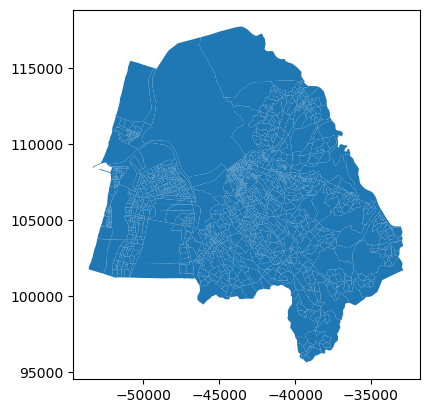

In [14]:
case_study_DTMN11 = ['0105','0110']
BGRI11_AVRILH = BGRI11_CONT_CLEAN[BGRI11_CONT_CLEAN['DTMN11'].isin(case_study_DTMN11)]
BGRI11_AVRILH.insert(0, 'CS', 'cs')
BGRI11_AVRILH[:3]
BGRI11_AVRILH.plot()

# LABEL BGRI11
USE: avrilh_network_wgs84_dfnodes_LABELED_Part1

In [15]:
avrilh_network_wgs84_dfnodes_LABELED_Part1 = pickle.load(open(sourcePIKLE + '/avrilh_network_wgs84_dfnodes_LABELED_Part1.pkl', "rb"))

In [16]:
type(avrilh_network_wgs84_dfnodes_LABELED_Part1)


pandas.core.frame.DataFrame

In [17]:
avrilh_network_wgs84_dfnodes_LABELED_Part1.head(1)

,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatContig,M1LABELS_LP_AdjMatGeoNetDist,M1LABELS_LS_AdjMatContig,M1LABELS_LS_AdjMatGeoNetDist
0,26018652,40.573359,-8.561106,-1,72,72,72,72


In [18]:
# Create a geodataframe from the nodes
avrilh_network_wgs84_dfnodes_LABELED_Part1_gpd = gpd.GeoDataFrame(avrilh_network_wgs84_dfnodes_LABELED_Part1, geometry=gpd.points_from_xy(avrilh_network_wgs84_dfnodes_LABELED_Part1['x'], avrilh_network_wgs84_dfnodes_LABELED_Part1['y']))

In [19]:
# Set the CRS
avrilh_network_wgs84_dfnodes_LABELED_Part1_gpd = avrilh_network_wgs84_dfnodes_LABELED_Part1_gpd.set_crs(epsg=4326, inplace=True)

In [20]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd = avrilh_network_wgs84_dfnodes_LABELED_Part1_gpd.to_crs(epsg=3763)

In [21]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.columns

Index(['NODE_ID', 'y', 'x', 'NODE_ZONE_CS', 'M1LABELS_LP_AdjMatContig',
       'M1LABELS_LP_AdjMatGeoNetDist', 'M1LABELS_LS_AdjMatContig',
       'M1LABELS_LS_AdjMatGeoNetDist', 'geometry'],
      dtype='object')

In [22]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.head()

,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatContig,M1LABELS_LP_AdjMatGeoNetDist,M1LABELS_LS_AdjMatContig,M1LABELS_LS_AdjMatGeoNetDist,geometry
0,26018652,40.573359,-8.561106,-1,72,72,72,72,POINT (-36240.866 100587.667)
1,26018669,40.567454,-8.560672,-1,0,0,0,0,POINT (-36207.316 99931.795)
2,26018671,40.568421,-8.560302,-1,72,72,72,72,POINT (-36175.496 100039.002)
3,26019628,40.627240,-8.730450,-1,81,81,49,49,POINT (-50539.674 106654.463)
4,26019631,40.625874,-8.726227,-1,50,86,50,86,POINT (-50183.405 106500.389)


In [23]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.to_file(sourceRawData+'/avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.shp')  

C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_34088\2714680863.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.to_file(sourceRawData+'/avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.shp')


In [24]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.to_csv(sourceRawData+"/avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.csv", index = False, header=True)

In [25]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.head(1)

,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatContig,M1LABELS_LP_AdjMatGeoNetDist,M1LABELS_LS_AdjMatContig,M1LABELS_LS_AdjMatGeoNetDist,geometry
0,26018652,40.573359,-8.561106,-1,72,72,72,72,POINT (-36240.866 100587.667)


## M1LABELS_LP_AdjMatGeoNetDist

### Create polygons of labeled nodes 

In [26]:
# Create a gpd with the a set of points for each zone 

avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist= avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.dissolve("M1LABELS_LP_AdjMatGeoNetDist")
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.head(1)

,geometry,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatContig,M1LABELS_LS_AdjMatContig,M1LABELS_LS_AdjMatGeoNetDist
M1LABELS_LP_AdjMatGeoNetDist,,,,,,,,
0,"MULTIPOINT (-49118.118 109718.798, -44004.797 ...",26018669,40.567454,-8.560672,-1,0,0,0


10
MultiPoint


C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_34088\325812985.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(len(avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.loc[1,'geometry']))


<AxesSubplot: >

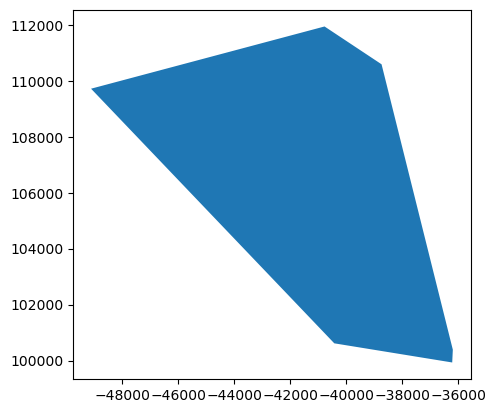

In [27]:
# tests
print(len(avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.loc[1,'geometry']))
print(avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.loc[1,'geometry'].geom_type)
gpd.GeoSeries(avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.loc[0,'geometry'].convex_hull).plot()


In [28]:
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist['geometry2'] = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.apply(lambda row : (gpd.GeoSeries(row["geometry"].convex_hull) ) if (row["geometry"].geom_type == 'MultiPoint') else (gpd.GeoSeries(row["geometry"].buffer(50))) , axis = 1)
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.head(1)

,geometry,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatContig,M1LABELS_LS_AdjMatContig,M1LABELS_LS_AdjMatGeoNetDist,geometry2
M1LABELS_LP_AdjMatGeoNetDist,,,,,,,,,
0,"MULTIPOINT (-49118.118 109718.798, -44004.797 ...",26018669,40.567454,-8.560672,-1,0,0,0,"POLYGON ((-36207.316 99931.795, -40422.760 100..."


In [29]:
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist_geometryPointsOri = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist['geometry']
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.drop(columns=['geometry', "M1LABELS_LP_AdjMatContig", "M1LABELS_LS_AdjMatContig", "M1LABELS_LS_AdjMatGeoNetDist"])
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.reset_index()
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.rename(columns={'geometry2': 'geometry'})
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = gpd.GeoDataFrame(avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist, geometry='geometry')
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.head(2)

,M1LABELS_LP_AdjMatGeoNetDist,NODE_ID,y,x,NODE_ZONE_CS,geometry
0,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-36207.316 99931.795, -40422.760 100..."
1,1,534789211,40.622386,-8.651588,-1,"POLYGON ((-44174.269 105620.752, -44183.854 10..."


<AxesSubplot: >

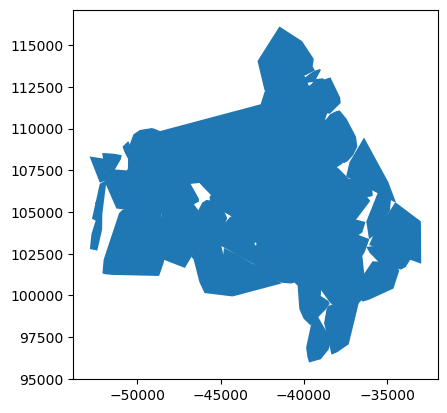

In [30]:
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.plot()

In [31]:
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist["geometry2"] = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.apply(lambda row : (gpd.GeoSeries(row["geometry"].buffer(50)) ) if (row["geometry"].geom_type != 'Polygon') else gpd.GeoSeries(row["geometry"]) , axis = 1)
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.drop(columns=['geometry'])
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.rename(columns={'geometry2': 'geometry'})
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = gpd.GeoDataFrame(avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist, geometry='geometry')
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.set_crs(epsg=3763, inplace=True)
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.head(1)


,M1LABELS_LP_AdjMatGeoNetDist,NODE_ID,y,x,NODE_ZONE_CS,geometry
0,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-36207.316 99931.795, -40422.760 100..."


<AxesSubplot: >

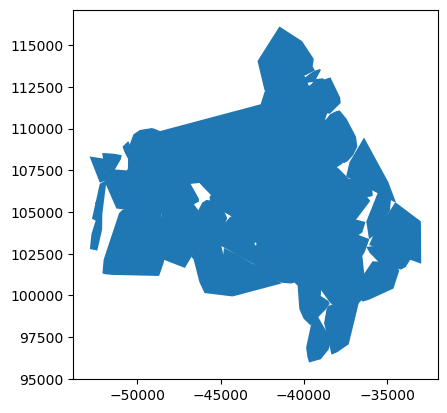

In [32]:
avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist.plot()

### Intercept (133) zones polygons with BGRI11

In [33]:
avrilh_BGRI11_gpd_M1LABELS_LP_AdjMatGeoNetDist = BGRI11_AVRILH[["BGRI11", "geometry"]].overlay(avrilh_LabelNodes_gpd_M1LABELS_LP_AdjMatGeoNetDist, how='intersection')
avrilh_BGRI11_gpd_M1LABELS_LP_AdjMatGeoNetDist["M1Labels_LP_AdjMatGeoNetDist_polyarea"] = avrilh_BGRI11_gpd_M1LABELS_LP_AdjMatGeoNetDist.area
print(avrilh_BGRI11_gpd_M1LABELS_LP_AdjMatGeoNetDist.shape)
avrilh_BGRI11_gpd_M1LABELS_LP_AdjMatGeoNetDist.head(2)

(5334, 8)


,BGRI11,M1LABELS_LP_AdjMatGeoNetDist,NODE_ID,y,x,NODE_ZONE_CS,geometry,M1Labels_LP_AdjMatGeoNetDist_polyarea
0,01050100510,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-43670.151 105673.794, -43679.471 10...",141979.280116
1,01050100512,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-43157.561 105693.283, -43170.509 10...",174175.515121


<AxesSubplot: >

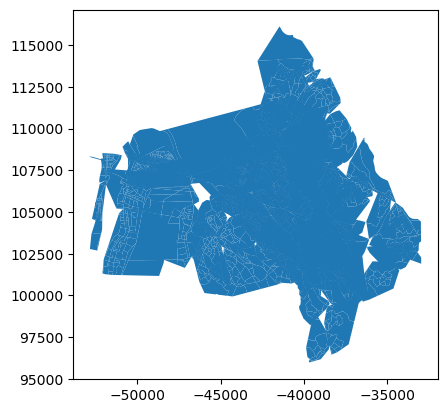

In [34]:
avrilh_BGRI11_gpd_M1LABELS_LP_AdjMatGeoNetDist.plot()

### Define, for each BGRI11 which is the original (133) zone 
Based on max area of intersection

In [35]:
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area = pd.pivot_table(avrilh_BGRI11_gpd_M1LABELS_LP_AdjMatGeoNetDist,
                                index=["BGRI11"],
                                values = "M1Labels_LP_AdjMatGeoNetDist_polyarea",
                                columns="M1LABELS_LP_AdjMatGeoNetDist",
                                aggfunc=np.sum,
                                fill_value=0,
                                #margins=True,
                                #margins_name = "Total"

                                )

print(BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area.shape)
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area.head(5)

(1863, 132)


M1LABELS_LP_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,17078.764493,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100102,35923.748036,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5532.631759,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100103,16797.479873,0.0,0.0,512.504084,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1091.436510,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100104,5772.768964,0.0,0.0,5009.113875,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100105,36752.677725,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop = BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area.iloc[:, 0:133].apply(lambda x: x/x.sum())
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.head(2)

M1LABELS_LP_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,0.000210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100102,0.000442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.705569,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop['BGRI11_M1LABELS_LP_AdjMatGeoNetDist'] = BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.idxmax(axis=1)
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.head(3)

M1LABELS_LP_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,BGRI11_M1LABELS_LP_AdjMatGeoNetDist
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,0.000210,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
01050100102,0.000442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.705569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124
01050100103,0.000207,0.0,0.0,0.008629,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.139189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124


In [38]:
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop['BGRI11_M1LABELS_LP_AdjMatGeoNetDist'].unique()

array([ 30, 124,   3,  58,  64, 108,  79,   1,  21,   5,   4,  52, 126,
         2,   6,  61,   8, 113, 112,  62,  12,   7,  84,  17,  99, 115,
       114, 117, 116, 128,  96,  16,   9,  10,  11,  90,  68,  88,  20,
        15,  59,  89,  83,  60,  63, 101, 107,  18,  82,  14,  45,  85,
        92,  80,  22,  55,  31, 110, 109, 111, 103,  57,  26, 104,  24,
        43,  29,  28,  37, 125,  27,  25,  33,  73,  93,  74,  94,  97,
        36,  71,  34,  70,  35,  95, 127,  69,  98,  23,  65,  38, 100,
        13,  39,  41, 102,  40,  44,  19, 106,  42, 105,  91,  66,  67,
       130, 129,  72,  32, 120, 123, 122,  49,  81, 119,  51,  47,  46,
        48,  50, 121, 118,  86, 131,  53,  54,  77,  75,  78,  56,  76],
      dtype=int64)

### See intermediate BGRI11 with labels

In [39]:
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1 = BGRI11_AVRILH.merge(BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop[['BGRI11_M1LABELS_LP_AdjMatGeoNetDist']], left_on='BGRI11', right_index = True, how='left')
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1.head()

,CS,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area,geometry,BGRI11_M1LABELS_LP_AdjMatGeoNetDist
16863,cs,0105,01050100510,014757,Aveiro,010501,141979.280116,1609.722426,141979.280116,"MULTIPOLYGON (((-43593.399 105717.183, -43670....",5.0
16864,cs,0105,01050100512,014757,Aveiro,010501,174175.515121,2078.292089,174175.515121,"MULTIPOLYGON (((-43164.196 105698.880, -43157....",5.0
16865,cs,0105,01050100701,014731,Bom Sucesso,010501,142290.509789,1977.776122,142290.509789,"MULTIPOLYGON (((-43359.708 105180.143, -43315....",4.0
31320,cs,0105,01051201803,014757,Aveiro,010512,93782.407361,2105.903866,93782.407361,"MULTIPOLYGON (((-42260.680 107955.967, -42278....",43.0
31321,cs,0105,01050201005,014737,Quinta do Loureiro,010502,115017.661542,1460.479229,115017.661542,"MULTIPOLYGON (((-38567.090 112031.679, -38552....",7.0


In [40]:
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1['BGRI11_M1LABELS_LP_AdjMatGeoNetDist'].unique()

array([  5.,   4.,  43.,   7.,  63.,  80.,  45.,  31.,  57., 108.,   3.,
        29.,  28.,  21.,  17.,  84.,  20.,  48.,  59., 106.,  40.,  41.,
       122.,  42.,  60., 102., 107.,  49.,  82.,  14.,  18., 101., 121.,
        81.,  30.,  50., 116.,  64.,  11.,  65., 129.,  67.,  25.,  27.,
       118.,  37.,  51.,  53.,  96., 119., 130.,  24.,  90., 104., 111.,
        70.,   2.,  75.,  78., 131.,  77.,  76.,  99.,  56., 123., 127.,
        69.,  52., 126.,  32.,  36., 117., 112.,  44.,  58., 125.,  86.,
        55.,  22.,   9.,  66., 120.,  54.,  71., 115.,  97., 114.,  34.,
        61.,  nan, 113.,  26., 128.,  10.,  62.,   8.,  12.,  73.,  72.,
        98.,  35.,  94.,  33.,  74., 100.,  68.,  38., 124.,  19.,  83.,
         6.,  15.,  88.,  95.,  23.,  47.,  79.,  46.,  93.,  39.,   1.,
        13.,  16., 103.,  91., 110., 109.,  85.,  92.,  89., 105.])

<AxesSubplot: >

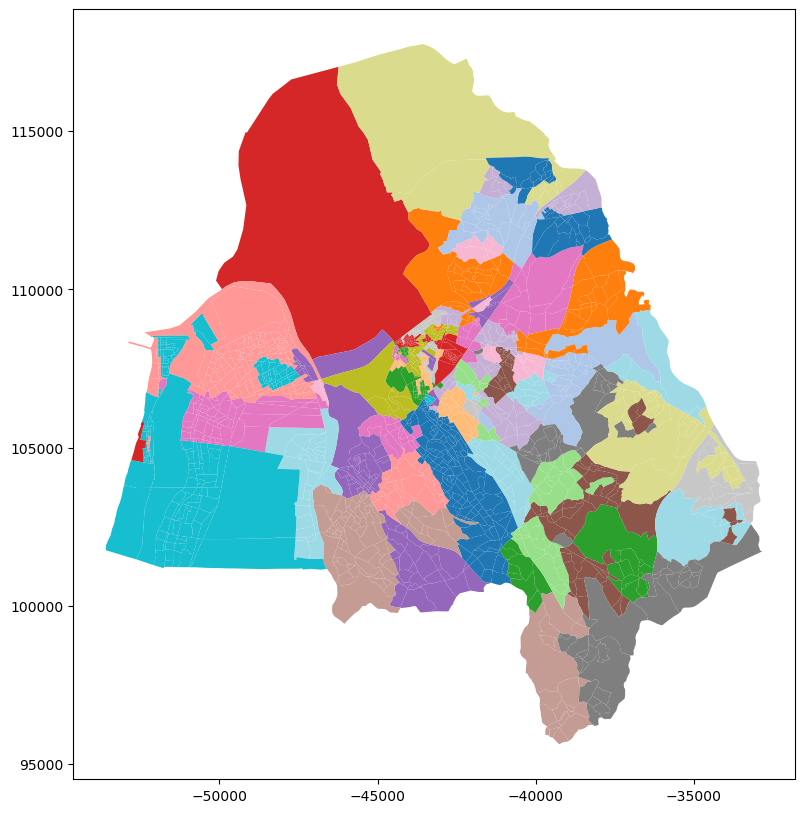

In [41]:
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1.plot(column='BGRI11_M1LABELS_LP_AdjMatGeoNetDist', legend=False, cmap = "tab20", figsize=(10,10))

In [42]:
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1[["BGRI11", "LUG11", "LUG11DESIG", "DICOFRE", "BGRI11_M1LABELS_LP_AdjMatGeoNetDist", "geometry" ]].to_file(sourceShapes+'/BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1.shp')
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1[["BGRI11", "BGRI11_M1LABELS_LP_AdjMatGeoNetDist"]].to_csv(sourceRawData+'/BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1.csv', index=False)

C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_34088\1655028789.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1[["BGRI11", "LUG11", "LUG11DESIG", "DICOFRE", "BGRI11_M1LABELS_LP_AdjMatGeoNetDist", "geometry" ]].to_file(sourceShapes+'/BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1.shp')


<AxesSubplot: >

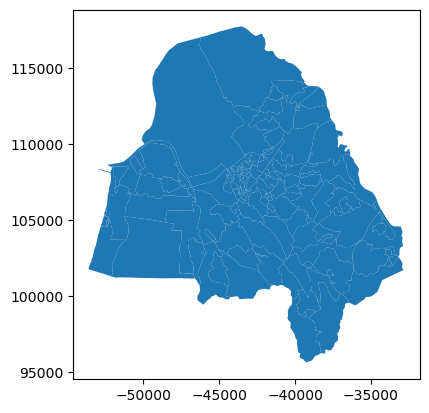

In [43]:
AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved = BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1.dissolve(by='BGRI11_M1LABELS_LP_AdjMatGeoNetDist')
AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved.plot()

In [44]:
AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved

,geometry,CS,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area
BGRI11_M1LABELS_LP_AdjMatGeoNetDist,,,,,,,,,,
1.0,"POLYGON ((-43858.268 105485.133, -43926.607 10...",cs,0105,01050100307,014733,Verdemilho,010501,36101.348937,789.640436,36101.348937
2.0,"POLYGON ((-41894.818 101023.152, -41985.704 10...",cs,0105,01050101311,014732,Quinta do Picado,010501,23840.548304,761.592149,23840.548304
3.0,"POLYGON ((-43381.069 106148.686, -43381.861 10...",cs,0105,01050100204,014757,Aveiro,010501,24286.501749,848.190841,24286.501749
4.0,"POLYGON ((-42925.331 103598.712, -42932.138 10...",cs,0105,01050100701,014731,Bom Sucesso,010501,142290.509789,1977.776122,142290.509789
5.0,"POLYGON ((-42665.937 104985.157, -42696.042 10...",cs,0105,01050100510,014757,Aveiro,010501,141979.280116,1609.722426,141979.280116
...,...,...,...,...,...,...,...,...,...,...
127.0,"MULTIPOLYGON (((-33655.933 101916.800, -33805....",cs,0105,01050900111,014755,Requeixo,010509,230142.711136,2675.252829,230142.711136
128.0,"POLYGON ((-34802.128 106131.765, -34823.188 10...",cs,0105,01050400501,014743,Eixo,010504,592340.740339,4380.610880,592340.740339
129.0,"POLYGON ((-40087.629 106314.591, -40104.294 10...",cs,0105,01051301203,014759,Sol Posto,010513,204990.080352,2789.681756,204990.080352


In [45]:
AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved_multipoligon = AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved[AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved["geometry"].geom_type == 'MultiPolygon']
print(AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved_multipoligon.shape)
AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved_multipoligon

(22, 10)


,geometry,CS,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area
BGRI11_M1LABELS_LP_AdjMatGeoNetDist,,,,,,,,,,
12.0,"MULTIPOLYGON (((-41134.611 111929.858, -41127....",cs,0105,01050200504,014738,Serrazola,010502,1.904745e+05,1968.017366,1.904745e+05
16.0,"MULTIPOLYGON (((-39732.944 107846.932, -39745....",cs,0105,01050500508,014760,Taboeira,010505,1.998547e+05,3848.789946,1.998547e+05
22.0,"MULTIPOLYGON (((-44397.889 107544.466, -44450....",cs,0105,01050600111,014757,Aveiro,010506,1.536931e+03,172.808778,1.536931e+03
26.0,"MULTIPOLYGON (((-43594.943 107660.125, -43615....",cs,0105,01050600510,014757,Aveiro,010506,5.077515e+03,291.898548,5.077515e+03
30.0,"MULTIPOLYGON (((-43908.417 106525.749, -43910....",cs,0105,01050601607,014757,Aveiro,010506,3.035458e+03,280.091888,3.035458e+03
40.0,"MULTIPOLYGON (((-44404.255 108364.582, -44386....",cs,0105,01051201408,014757,Aveiro,010512,2.193665e+03,221.453178,2.193665e+03
41.0,"MULTIPOLYGON (((-44052.394 108337.861, -44054....",cs,0105,01051201504,014757,Aveiro,010512,3.204172e+03,235.854148,3.204172e+03
43.0,"MULTIPOLYGON (((-42523.819 107581.376, -42538....",cs,0105,01051201803,014757,Aveiro,010512,9.378241e+04,2105.903866,9.378241e+04
50.0,"MULTIPOLYGON (((-49710.313 106666.070, -49732....",cs,0110,01100302406,014935,Gafanha da Nazaré,011003,1.411735e+04,517.080760,1.411735e+04


In [46]:
AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_dissolved_multipoligon

,geometry,CS,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area
BGRI11_M1LABELS_LP_AdjMatGeoNetDist,,,,,,,,,,
12.0,"MULTIPOLYGON (((-41134.611 111929.858, -41127....",cs,0105,01050200504,014738,Serrazola,010502,1.904745e+05,1968.017366,1.904745e+05
16.0,"MULTIPOLYGON (((-39732.944 107846.932, -39745....",cs,0105,01050500508,014760,Taboeira,010505,1.998547e+05,3848.789946,1.998547e+05
22.0,"MULTIPOLYGON (((-44397.889 107544.466, -44450....",cs,0105,01050600111,014757,Aveiro,010506,1.536931e+03,172.808778,1.536931e+03
26.0,"MULTIPOLYGON (((-43594.943 107660.125, -43615....",cs,0105,01050600510,014757,Aveiro,010506,5.077515e+03,291.898548,5.077515e+03
30.0,"MULTIPOLYGON (((-43908.417 106525.749, -43910....",cs,0105,01050601607,014757,Aveiro,010506,3.035458e+03,280.091888,3.035458e+03
40.0,"MULTIPOLYGON (((-44404.255 108364.582, -44386....",cs,0105,01051201408,014757,Aveiro,010512,2.193665e+03,221.453178,2.193665e+03
41.0,"MULTIPOLYGON (((-44052.394 108337.861, -44054....",cs,0105,01051201504,014757,Aveiro,010512,3.204172e+03,235.854148,3.204172e+03
43.0,"MULTIPOLYGON (((-42523.819 107581.376, -42538....",cs,0105,01051201803,014757,Aveiro,010512,9.378241e+04,2105.903866,9.378241e+04
50.0,"MULTIPOLYGON (((-49710.313 106666.070, -49732....",cs,0110,01100302406,014935,Gafanha da Nazaré,011003,1.411735e+04,517.080760,1.411735e+04


### Identify which zones are not allocated to BGRI11 (to merge with other zones)

In [47]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.columns

Index(['NODE_ID', 'y', 'x', 'NODE_ZONE_CS', 'M1LABELS_LP_AdjMatContig',
       'M1LABELS_LP_AdjMatGeoNetDist', 'M1LABELS_LS_AdjMatContig',
       'M1LABELS_LS_AdjMatGeoNetDist', 'geometry'],
      dtype='object')

In [48]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd_clean = avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.drop(columns=['M1LABELS_LP_AdjMatContig', 'M1LABELS_LS_AdjMatContig','M1LABELS_LS_AdjMatGeoNetDist'])
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd_clean.head(2)

,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatGeoNetDist,geometry
0,26018652,40.573359,-8.561106,-1,72,POINT (-36240.866 100587.667)
1,26018669,40.567454,-8.560672,-1,0,POINT (-36207.316 99931.795)


In [49]:
# Labels que não têm representatividade ao nível da BGRI11
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_noAssingned = list(set(list(avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd_clean["M1LABELS_LP_AdjMatGeoNetDist"].unique())).difference(list(BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.BGRI11_M1LABELS_LP_AdjMatGeoNetDist.unique()) ) )
BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1_noAssingned

[0, 87]

In [50]:
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.iloc[:,0].argmax()

913

In [51]:
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.head()

M1LABELS_LP_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,BGRI11_M1LABELS_LP_AdjMatGeoNetDist
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,0.000210,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
01050100102,0.000442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.705569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124
01050100103,0.000207,0.0,0.0,0.008629,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.139189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124
01050100104,0.000071,0.0,0.0,0.084341,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
01050100105,0.000452,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58


In [52]:
(BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.iloc[BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.loc[:,87].argmax(),:]).name

'01050201104'

In [53]:
BGRI11_M1LABELS_LP_AdjMatGeoNetDist_Area_prop.loc['01050201104','BGRI11_M1LABELS_LP_AdjMatGeoNetDist']


84

## M1LABELS_LS_AdjMatGeoNetDist

### Create polygons of labeled nodes 

In [57]:
# Create a gpd with the a set of points for each zone 

avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist= avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.dissolve("M1LABELS_LS_AdjMatGeoNetDist")
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.head(1)

,geometry,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatContig,M1LABELS_LP_AdjMatGeoNetDist,M1LABELS_LS_AdjMatContig
M1LABELS_LS_AdjMatGeoNetDist,,,,,,,,
0,"MULTIPOINT (-50226.109 109646.273, -49945.410 ...",26018669,40.567454,-8.560672,-1,0,0,0


56
MultiPoint


C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_34088\3409013697.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(len(avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.loc[1,'geometry']))


<AxesSubplot: >

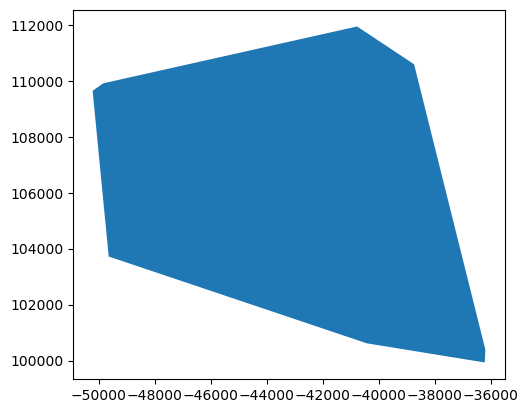

In [58]:
# tests
print(len(avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.loc[1,'geometry']))
print(avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.loc[1,'geometry'].geom_type)
gpd.GeoSeries(avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.loc[0,'geometry'].convex_hull).plot()


In [59]:
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist['geometry2'] = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.apply(lambda row : (gpd.GeoSeries(row["geometry"].convex_hull) ) if (row["geometry"].geom_type == 'MultiPoint') else (gpd.GeoSeries(row["geometry"].buffer(50))) , axis = 1)
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.head(1)

,geometry,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LP_AdjMatContig,M1LABELS_LP_AdjMatGeoNetDist,M1LABELS_LS_AdjMatContig,geometry2
M1LABELS_LS_AdjMatGeoNetDist,,,,,,,,,
0,"MULTIPOINT (-50226.109 109646.273, -49945.410 ...",26018669,40.567454,-8.560672,-1,0,0,0,"POLYGON ((-36207.316 99931.795, -40422.760 100..."


In [60]:
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist_geometryPointsOri = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist['geometry']
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.drop(columns=['geometry', "M1LABELS_LP_AdjMatContig", "M1LABELS_LP_AdjMatGeoNetDist", "M1LABELS_LS_AdjMatContig"])
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.reset_index()
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.rename(columns={'geometry2': 'geometry'})
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = gpd.GeoDataFrame(avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist, geometry='geometry')
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.head(2)

,M1LABELS_LS_AdjMatGeoNetDist,NODE_ID,y,x,NODE_ZONE_CS,geometry
0,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-36207.316 99931.795, -40422.760 100..."
1,1,390067648,40.624914,-8.650740,-1,"POLYGON ((-43885.827 105347.649, -44081.408 10..."


<AxesSubplot: >

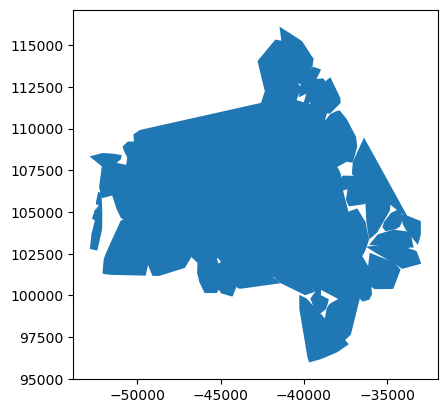

In [61]:
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.plot()

In [62]:
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist["geometry2"] = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.apply(lambda row : (gpd.GeoSeries(row["geometry"].buffer(50)) ) if (row["geometry"].geom_type != 'Polygon') else gpd.GeoSeries(row["geometry"]) , axis = 1)
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.drop(columns=['geometry'])
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.rename(columns={'geometry2': 'geometry'})
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = gpd.GeoDataFrame(avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist, geometry='geometry')
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist = avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.set_crs(epsg=3763, inplace=True)
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.head(1)


,M1LABELS_LS_AdjMatGeoNetDist,NODE_ID,y,x,NODE_ZONE_CS,geometry
0,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-36207.316 99931.795, -40422.760 100..."


<AxesSubplot: >

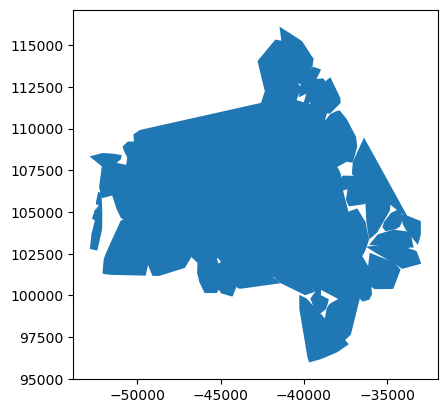

In [63]:
avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist.plot()

### Intercept (133) zones polygons with BGRI11

In [64]:
avrilh_BGRI11_gpd_M1LABELS_LS_AdjMatGeoNetDist = BGRI11_AVRILH[["BGRI11", "geometry"]].overlay(avrilh_LabelNodes_gpd_M1LABELS_LS_AdjMatGeoNetDist, how='intersection')
avrilh_BGRI11_gpd_M1LABELS_LS_AdjMatGeoNetDist["M1Labels_LS_AdjMatGeoNetDist_polyarea"] = avrilh_BGRI11_gpd_M1LABELS_LS_AdjMatGeoNetDist.area
print(avrilh_BGRI11_gpd_M1LABELS_LS_AdjMatGeoNetDist.shape)
avrilh_BGRI11_gpd_M1LABELS_LS_AdjMatGeoNetDist.head(2)

(5736, 8)


,BGRI11,M1LABELS_LS_AdjMatGeoNetDist,NODE_ID,y,x,NODE_ZONE_CS,geometry,M1Labels_LS_AdjMatGeoNetDist_polyarea
0,01050100510,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-43670.151 105673.794, -43679.471 10...",141979.280116
1,01050100512,0,26018669,40.567454,-8.560672,-1,"POLYGON ((-43157.561 105693.283, -43170.509 10...",174175.515121


<AxesSubplot: >

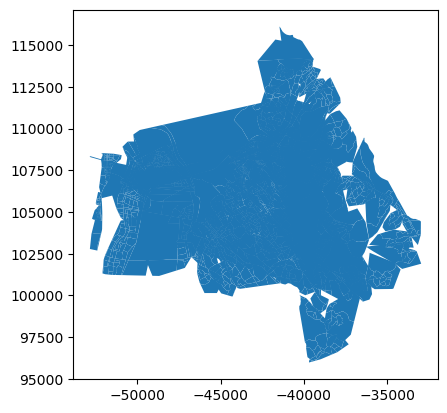

In [65]:
avrilh_BGRI11_gpd_M1LABELS_LS_AdjMatGeoNetDist.plot()

### Define, for each BGRI11 which is the original (133) zone 
Based on max area of intersection

In [66]:
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area = pd.pivot_table(avrilh_BGRI11_gpd_M1LABELS_LS_AdjMatGeoNetDist,
                                index=["BGRI11"],
                                values = "M1Labels_LS_AdjMatGeoNetDist_polyarea",
                                columns="M1LABELS_LS_AdjMatGeoNetDist",
                                aggfunc=np.sum,
                                fill_value=0,
                                #margins=True,
                                #margins_name = "Total"

                                )

print(BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area.shape)
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area.head(5)

(1863, 132)


M1LABELS_LS_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,17078.764493,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100102,35923.748036,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5532.631759,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100103,16797.479873,0.0,0.0,11388.277332,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1091.436510,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100104,5772.768964,0.0,0.0,5742.811726,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100105,36752.677725,0.0,0.0,1421.292385,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop = BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area.iloc[:, 0:133].apply(lambda x: x/x.sum())
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.head(2)

M1LABELS_LS_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,0.000149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01050100102,0.000313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.705569,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop['BGRI11_M1LABELS_LS_AdjMatGeoNetDist'] = BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.idxmax(axis=1)
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.head(3)

M1LABELS_LS_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,BGRI11_M1LABELS_LS_AdjMatGeoNetDist
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,0.000149,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
01050100102,0.000313,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.705569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124
01050100103,0.000146,0.0,0.0,0.01787,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.139189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124


In [69]:
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop['BGRI11_M1LABELS_LS_AdjMatGeoNetDist'].unique()

array([ 30, 124,   3,  58,   1,  25, 108,  79,  21,   5,   0,   4,   2,
       126,  78,   6,  61,   8, 113, 112,  62,   7,  12,  84,  17, 115,
       128, 114,  99,  71, 117,  68, 116,   9,  10,  11,  96,  16,  90,
        88,  20,  15,  59,  89,  14,  83,  60,  86,  18,  19,  82,  42,
        63,  45,  85,  92,  80,  22,  44,  31, 110, 109, 105, 111,  57,
        26, 104,  24,  29,  28,  37, 125,  64,  27,  33,  74,  93,  94,
        97,  36,  34,  70,  35,  95, 127,  69,  98,  32,  23,  38, 100,
        65,  13,  39, 101,  41, 102,  40, 107,  43, 103, 106,  91,  66,
        67, 130, 129,  72,  73, 120, 123, 122,  49,  81,  46,  51,  47,
       119, 121,  48,  55, 118,  50, 131,  77,  54,  53,  52,  56,  75,
        76], dtype=int64)

### See intermediate BGRI11 with labels

In [70]:
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1 = BGRI11_AVRILH.merge(BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop[['BGRI11_M1LABELS_LS_AdjMatGeoNetDist']], left_on='BGRI11', right_index = True, how='left')
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1.head(3)

,CS,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area,geometry,BGRI11_M1LABELS_LS_AdjMatGeoNetDist
16863,cs,0105,01050100510,014757,Aveiro,010501,141979.280116,1609.722426,141979.280116,"MULTIPOLYGON (((-43593.399 105717.183, -43670....",3.0
16864,cs,0105,01050100512,014757,Aveiro,010501,174175.515121,2078.292089,174175.515121,"MULTIPOLYGON (((-43164.196 105698.880, -43157....",5.0
16865,cs,0105,01050100701,014731,Bom Sucesso,010501,142290.509789,1977.776122,142290.509789,"MULTIPOLYGON (((-43359.708 105180.143, -43315....",4.0


In [71]:
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1['BGRI11_M1LABELS_LS_AdjMatGeoNetDist'].unique()

array([  3.,   5.,   4.,  26.,   7.,  59.,  80.,  45., 109.,  25.,  29.,
        28.,  21.,  17.,  84.,  20.,  15., 121., 106.,  40.,  31.,  63.,
        41.,  48., 122., 102.,  42.,  60.,  43.,  82.,  18.,  14., 101.,
        19.,  86.,  16.,  49.,  30.,  50., 118., 117., 116.,  23., 108.,
        11., 129.,  67.,  58.,  27.,  37.,  51.,  54., 130.,  96.,  24.,
       104.,   9.,  70.,  78.,  75.,   2., 131.,  56.,  77.,  69., 123.,
       127.,  52., 126.,  32.,  99.,  71., 115.,  34.,  81., 112.,  44.,
       125.,  64.,  22.,  55.,  90.,  66., 111., 120.,  97.,  36.,  53.,
       119., 114.,  61.,  nan,   6.,  91., 128.,  10.,  62.,   8.,  12.,
        73.,  76.,  72.,  98.,  35.,  74.,  94.,  33.,  68.,  65.,  95.,
       100.,  38., 124., 107.,  83.,  88., 113.,  46.,  47.,   1.,  79.,
        93.,  39.,   0.,  13., 105., 110.,  85.,  57.,  92.,  89., 103.])

In [72]:
len(BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1['BGRI11_M1LABELS_LS_AdjMatGeoNetDist'].unique())

132

<AxesSubplot: >

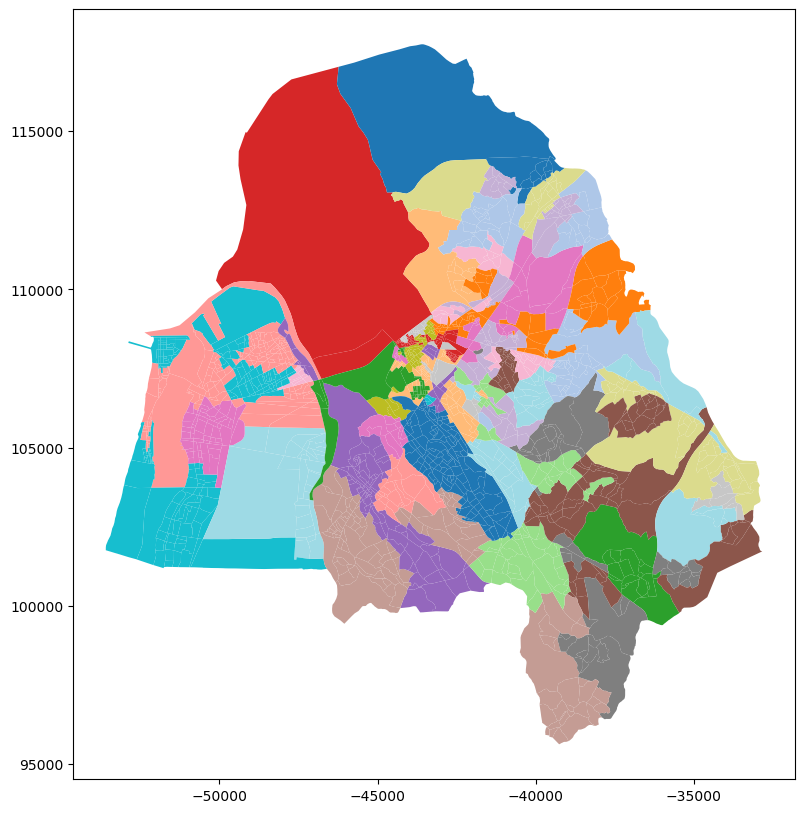

In [73]:
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1.plot(column='BGRI11_M1LABELS_LS_AdjMatGeoNetDist', legend=False, cmap = "tab20", figsize=(10,10))

In [74]:
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1[["BGRI11", "LUG11", "LUG11DESIG", "DICOFRE", "BGRI11_M1LABELS_LS_AdjMatGeoNetDist", "geometry" ]].to_file(sourceShapes+'/BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1.shp')
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1[["BGRI11", "BGRI11_M1LABELS_LS_AdjMatGeoNetDist"]].to_csv(sourceRawData+'/BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1.csv', index=False)

C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_34088\1535247445.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1[["BGRI11", "LUG11", "LUG11DESIG", "DICOFRE", "BGRI11_M1LABELS_LS_AdjMatGeoNetDist", "geometry" ]].to_file(sourceShapes+'/BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1.shp')


<AxesSubplot: >

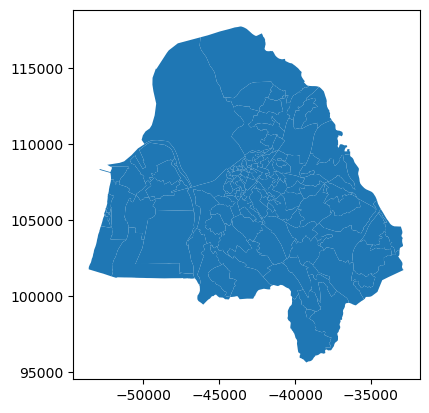

In [75]:
AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_dissolved = BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1.dissolve(by='BGRI11_M1LABELS_LS_AdjMatGeoNetDist')
AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_dissolved.plot()

In [76]:
AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_dissolved_multipoligon = AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_dissolved[AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_dissolved["geometry"].geom_type == 'MultiPolygon']
print(AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_dissolved_multipoligon.shape)
AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_dissolved_multipoligon

(19, 10)


,geometry,CS,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area
BGRI11_M1LABELS_LS_AdjMatGeoNetDist,,,,,,,,,,
2.0,"MULTIPOLYGON (((-42213.401 102802.310, -42261....",cs,0105,01050800609,014751,Quintãs,010508,1.263650e+05,1537.175421,1.263650e+05
5.0,"MULTIPOLYGON (((-43390.582 105221.828, -43425....",cs,0105,01050100512,014757,Aveiro,010501,1.741755e+05,2078.292089,1.741755e+05
6.0,"MULTIPOLYGON (((-40167.139 113114.694, -40180....",cs,0105,01050200113,999999,Residual,010502,1.758460e+07,19592.878421,1.758460e+07
9.0,"MULTIPOLYGON (((-38979.844 107301.719, -39032....",cs,0105,01050400203,014743,Eixo,010504,1.263500e+05,1983.412247,1.263500e+05
16.0,"MULTIPOLYGON (((-39655.364 107820.450, -39680....",cs,0105,01050500511,014760,Taboeira,010505,2.949684e+05,2278.176554,2.949684e+05
25.0,"MULTIPOLYGON (((-43554.378 106596.613, -43555....",cs,0105,01050600902,014757,Aveiro,010506,1.353635e+05,2202.297837,1.353635e+05
26.0,"MULTIPOLYGON (((-43272.849 107409.837, -43287....",cs,0105,01051201803,014757,Aveiro,010512,9.378241e+04,2105.903866,9.378241e+04
37.0,"MULTIPOLYGON (((-41390.372 106951.630, -41356....",cs,0105,01051300904,014757,Aveiro,010513,2.159414e+04,612.328510,2.159414e+04
42.0,"MULTIPOLYGON (((-43533.139 108199.499, -43534....",cs,0105,01051201204,014757,Aveiro,010512,9.342804e+03,566.801287,9.342804e+03


### Identify which zones are not allocated to BGRI11 (to merge with other zones)

In [77]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.columns

Index(['NODE_ID', 'y', 'x', 'NODE_ZONE_CS', 'M1LABELS_LP_AdjMatContig',
       'M1LABELS_LP_AdjMatGeoNetDist', 'M1LABELS_LS_AdjMatContig',
       'M1LABELS_LS_AdjMatGeoNetDist', 'geometry'],
      dtype='object')

In [78]:
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd_clean = avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd.drop(columns=['M1LABELS_LP_AdjMatContig', 'M1LABELS_LP_AdjMatGeoNetDist','M1LABELS_LS_AdjMatContig'])
avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd_clean.head(2)

,NODE_ID,y,x,NODE_ZONE_CS,M1LABELS_LS_AdjMatGeoNetDist,geometry
0,26018652,40.573359,-8.561106,-1,72,POINT (-36240.866 100587.667)
1,26018669,40.567454,-8.560672,-1,0,POINT (-36207.316 99931.795)


In [79]:
# Labels que não têm representatividade ao nível da BGRI11
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_noAssingned = list(set(list(avrilh_network_PTcrs_dfnodes_LABELED_Part1_gpd_clean["M1LABELS_LS_AdjMatGeoNetDist"].unique())).difference(list(BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.BGRI11_M1LABELS_LS_AdjMatGeoNetDist.unique()) ) )
BGRI11_AVRILH_M1LABELS_LS_AdjMatGeoNetDist_v1_noAssingned

[87]

In [80]:
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.iloc[:,0].argmax()

913

In [81]:
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.head()

M1LABELS_LS_AdjMatGeoNetDist,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,BGRI11_M1LABELS_LS_AdjMatGeoNetDist
BGRI11,,,,,,,,,,,,,,,,,,,,,
01050100101,0.000149,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
01050100102,0.000313,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.705569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124
01050100103,0.000146,0.0,0.0,0.017870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.139189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124
01050100104,0.000050,0.0,0.0,0.009011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
01050100105,0.000320,0.0,0.0,0.002230,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58


In [82]:
(BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.iloc[BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.loc[:,87].argmax(),:]).name

'01050201104'

In [83]:
BGRI11_M1LABELS_LS_AdjMatGeoNetDist_Area_prop.loc['01050201104','BGRI11_M1LABELS_LS_AdjMatGeoNetDist']


84